# The weather in Zurich, part two

If you are coming here from [the previous weather notebook](weather-trends.ipynb) you can skip the introduction.

There are several weather stations placed around the city of Zurich. One of them is operated by the "Wasserschutzpolizei". It has been collecting detailed weather data for several years and is placed close to Mythenquai.

We can get temperature, humidity, rain fall, solar radiation, and more for each 10minute period of the last few years. We can even get a reading of the water level of the lake!

In this notebook we will look at how the temperature and humidity vary over the year. We will also count the number of rainy days in the year.

The year 2017 is not over yet, so we will use data from 2016 instead.

To get started we import a few libraries that we will need later:

In [1]:
%matplotlib inline

import pandas as pd

from utils import get_weather_data

We will use a handy [utility function](/edit/utils.py) to fetch and load the data. If you'd like to see how it was made checkout [the previous weather notebook](weather-trends.ipynb).

In [2]:
weather = get_weather_data()

What was the hottest temperature of the year? And what the coldest? How about the average? Questions like that are so common there is a little function to compute them for us:

In [3]:
weather.describe()

,Temp,WaterTemp,Windchill,Pressure,Rain,Dewpoint,Radiation,Humidity,Waterlevel
count,52657.000000,52657.000000,52657.000000,52657.000000,52657.000000,52657.000000,52657.000000,52657.000000,52657.000000
mean,11.276250,13.338077,9.851032,969.584433,0.023380,7.381003,126.302220,78.968171,405.944256
std,7.738774,6.725756,8.495498,8.106922,0.153164,6.226824,215.895984,14.981863,0.129025
min,-6.700000,4.900000,-13.600000,940.300000,0.000000,-8.400000,0.000000,24.000000,405.720000
25%,5.000000,6.800000,2.900000,964.900000,0.000000,2.000000,0.000000,70.000000,405.860000
50%,10.200000,12.000000,8.700000,969.700000,0.000000,6.800000,2.000000,82.000000,405.940000
75%,17.100000,20.000000,16.400000,974.500000,0.000000,12.800000,155.000000,91.000000,406.030000
max,34.500000,25.600000,35.000000,994.500000,10.200000,23.300000,1114.000000,100.000000,406.400000


We can see that the average temperature was about 11C, the lake is a little warmer on average (13C), and the water level of the lake averages to about 406m.

You can also see the highest (34.5C) and lowest (-6.7C) temperature. The most it rained in any ten minute period was about 10mm!

To find out when the highest and lowest temeprature occured we can use the `argmax()` and `argmin()` functions.

In [4]:
print("Hottest moment:", weather['Temp'].argmax())
print("Coldest moment:", weather['Temp'].argmin())

Hottest moment: 2016-06-24 18:00:00
Coldest moment: 2016-01-18 05:00:00


---

#### Challenge

Can you modify the above bit of code to find the moment when the lake water was the warmest and coldest? What about the rainiest ten minutes of the year?

---

## How the sun influences the temperature

Do you know when the coldest part of the day is? Let's find out. We can group all observations made at the same moment in time together and average them. This gives us the average temperature at say 0:10h in the morning, and at 13:00h, etc.

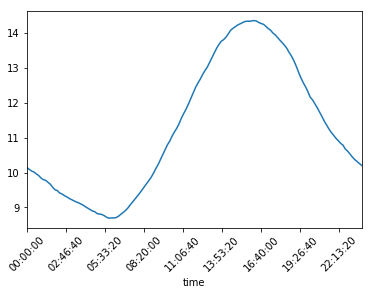

In [5]:
weather['Temp'].groupby(weather['Temp'].index.time).mean().plot(rot=45);

The coldest part of the day is just before the sun rises again! Around 5:30 in the morning.

## Lake temperature

How does the temperature of the lake change over the course of the year and how does it related to the air temperature?

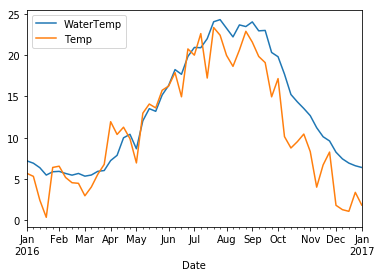

In [6]:
weather[['WaterTemp', 'Temp']].resample('W').mean().plot();

It looks like the water temperature increases like the air temperature as summer approaches. However it takes a lot longer to cool down in autumn because its [heat capacity](https://en.wikipedia.org/wiki/Heat_capacity) is so large.

If the water is so slow to change, can we see a difference between day and night? Let's try. Reusing the snippet of code from above that computes the average air temperature over the course of the day we can do the same for the water temperature.

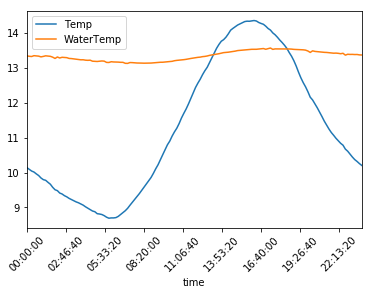

In [7]:
weather[['Temp', 'WaterTemp']].groupby(weather['Temp'].index.time).mean().plot(rot=45);

There is a small difference, but it is maybe only half a degree Celcius.